In [1]:

import time
import pandas as pd
import glob
import numpy as np
import timeit
import pickle
import ast
from datetime import datetime
from collections import Counter


from multiprocessing import Pool
from matplotlib import pyplot as plt
def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
start_time = timeit.default_timer()

# import matplotlib.pyplot as plt

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
%config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
#matplotlib.rcParams.update({'font.size': 18})

path_dicts='/mnt/sdb1/sandeep/dicts_chess/'

# with open(file_to_read) as f:
#     exec(f.read())
    
# import ast


In [ ]:
start_time = timeit.default_timer()
count_store=0
t_ic=time.time()


p=Pool(processes=15)
names=path_dicts+"parquets/dict_full_careers*"

# names=path_dicts+"parquets/dict_full_careers*" # all files
files=sorted(glob.glob(names))
df_careers = pd.concat(p.map(pd.read_parquet,files),ignore_index=True)
print('loaded careers=',toc(start_time))

p.close()

#----------------------------------------------------------
### CREATING NEW COLUMNS
#----------------------------------------------------------

pd.options.mode.chained_assignment = None  # default='warn'
# df_careers["is_white"]=""
df_careers["is_white"]=np.where(df_careers["white_player"]==df_careers["player_id"],1,0)

t_oc=time.time()
with open("/mnt/sdb1/sandeep/0. Careers in chess/0.z_MAIN_progress.txt", "a") as file_object:
            file_object.write('IS_WHITE----time (s)-'+str(round(t_oc-t_ic,2))+'\n')


conditions  = [ (df_careers["result_"]=='1-0') &(df_careers["is_white"]==1),
               (df_careers["result_"]=='0-1') &(df_careers["is_white"]==0),
              (df_careers["result_"]=='1/2-1/2')]
choices     = [ 1,1,0.5 ]    
df_careers["won_"] = np.select(conditions, choices, default=0)
t_oc=time.time()
with open("/mnt/sdb1/sandeep/0. Careers in chess/0.z_MAIN_progress.txt", "a") as file_object:
            file_object.write('won_----time (s)-'+str(round(t_oc-t_ic,2))+'\n')


df_careers["utcdate"]=df_careers["utcdate"]+' '+df_careers["utctime"]

t_oc=time.time()
# with open("/mnt/sdb1/sandeep/0. Careers in chess/0.z_MAIN_progress.txt", "a") as file_object:
#             file_object.write('IS_WHITE----time (s)-'+str(round(t_oc-t_ic,2))+'\n')


#----------------------------------------------------------
### Merging datetime
#----------------------------------------------------------
from datetime import datetime

t_ic=time.time()


t_oc=time.time()
with open("/mnt/sdb1/sandeep/0. Careers in chess/0.z_MAIN_progress.txt", "a") as file_object:
            file_object.write('start datetime_----time (s)-'+str(round(t_oc-t_ic,2))+'\n')

format_='%Y.%m.%d %H:%M:%S'
df_careers["utcdate"]=pd.to_datetime(pd.Series(df_careers["utcdate"]), format=format_)


t_oc=time.time()
with open("/mnt/sdb1/sandeep/0. Careers in chess/0.z_MAIN_progress.txt", "a") as file_object:
            file_object.write('finished datetime----time (s)-'+str(round(t_oc-t_ic,2))+'\n')

#----------------------------------------------------------
### Finding career start and ends within the dataframe
#----------------------------------------------------------

ids=np.array(df_careers['player_id'])
ind=np.where(~(ids[1:ids.shape[0]]==ids[0:ids.shape[0]-1]))

ind=ind[0]
career_lens=ind[1:len(ind)]-ind[0:len(ind)-1]
tot_careers_=sum(np.array(career_lens)>500)
ind=[0]+list(ind)

t_oc=time.time()

with open("/mnt/sdb1/sandeep/0. Careers in chess/0.z_MAIN_progress.txt", "a") as file_object:
            file_object.write('np where ind----time (s)-'+str(round(t_oc-t_ic,2))+'\n')
#----------------------------------------------------------
### Sorting
#----------------------------------------------------------
# df_careers=df_careers.sort_values(['player_id', 'utcdate'])
# t_oc=time.time()
# with open("/mnt/sdb1/sandeep/0. Careers in chess/0.z_MAIN_progress.txt", "a") as file_object:
#             file_object.write('SORTED----time (s)-'+str(round(t_oc-t_ic,2))+'\n')


# #writing to parquet
# file_name=path_dicts+"parquets/0.new_dicts_df_career"+str(it_load_files)+".csv"
# df_careers.to_csv(file_name, sep='\t',index=None)
# #     names_par=path_dicts+"parquets/0.new_dicts_df_career"+str(it_load_files)+".parquet"
# #     df_careers.to_parquet(names_par,index=None)

# t_oc = time.time();
# print('done=','-----',it_load_files)
# with open("/mnt/sdb1/sandeep/0. Careers in chess/0.z_MAIN_progress.txt", "a") as file_object:
#     file_object.write('--i.e.-'+str(it_load_files)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')



        


In [ ]:
start_time = timeit.default_timer()
count_store=0
t_ic=time.time()

for it_load_files in range(2,10):
    p=Pool(processes=15)
    names=path_dicts+"parquets/dict_full_careers"+str(it_load_files)+"*"

    # names=path_dicts+"parquets/dict_full_careers*" # all files
    files=sorted(glob.glob(names))
    df_careers = pd.concat(p.map(pd.read_parquet,files),ignore_index=True)
    print('loaded careers=',toc(start_time))

    p.close()

    #----------------------------------------------------------
    ### CREATING NEW COLUMNS
    #----------------------------------------------------------

    pd.options.mode.chained_assignment = None  # default='warn'
    # df_careers["is_white"]=""
    df_careers["is_white"]=np.where(df_careers["white_player"]==df_careers["player_id"],1,0)

    t_oc=time.time()
    with open("/mnt/sdb1/sandeep/0. Careers in chess/0.z_MAIN_progress.txt", "a") as file_object:
                file_object.write('IS_WHITE----time (s)-'+str(round(t_oc-t_ic,2))+'\n')


    conditions  = [ (df_careers["result_"]=='1-0') &(df_careers["is_white"]==1),
                   (df_careers["result_"]=='0-1') &(df_careers["is_white"]==0),
                  (df_careers["result_"]=='1/2-1/2')]
    choices     = [ 1,1,0.5 ]    
    df_careers["won_"] = np.select(conditions, choices, default=0)
    t_oc=time.time()
    with open("/mnt/sdb1/sandeep/0. Careers in chess/0.z_MAIN_progress.txt", "a") as file_object:
                file_object.write('won_----time (s)-'+str(round(t_oc-t_ic,2))+'\n')


    df_careers["utcdate"]=df_careers["utcdate"]+' '+df_careers["utctime"]

    t_oc=time.time()
    # with open("/mnt/sdb1/sandeep/0. Careers in chess/0.z_MAIN_progress.txt", "a") as file_object:
    #             file_object.write('IS_WHITE----time (s)-'+str(round(t_oc-t_ic,2))+'\n')


    #----------------------------------------------------------
    ### Merging datetime
    #----------------------------------------------------------
    from datetime import datetime

    t_ic=time.time()


    t_oc=time.time()
    with open("/mnt/sdb1/sandeep/0. Careers in chess/0.z_MAIN_progress.txt", "a") as file_object:
                file_object.write('start datetime_----time (s)-'+str(round(t_oc-t_ic,2))+'\n')

    format_='%Y.%m.%d %H:%M:%S'
    df_careers["utcdate"]=pd.to_datetime(pd.Series(df_careers["utcdate"]), format=format_)


    t_oc=time.time()
    with open("/mnt/sdb1/sandeep/0. Careers in chess/0.z_MAIN_progress.txt", "a") as file_object:
                file_object.write('finished datetime----time (s)-'+str(round(t_oc-t_ic,2))+'\n')

    #----------------------------------------------------------
    ### Finding career start and ends within the dataframe
    #----------------------------------------------------------

    ids=np.array(df_careers['player_id'])
    ind=np.where(~(ids[1:ids.shape[0]]==ids[0:ids.shape[0]-1]))

    ind=ind[0]
    career_lens=ind[1:len(ind)]-ind[0:len(ind)-1]
    tot_careers_=sum(np.array(career_lens)>500)
    ind=[0]+list(ind)
    t_oc=time.time()
    with open("/mnt/sdb1/sandeep/0. Careers in chess/0.z_MAIN_progress.txt", "a") as file_object:
                file_object.write('np where ind----time (s)-'+str(round(t_oc-t_ic,2))+'\n')

    df_careers=df_careers.sort_values(['player_id', 'utcdate'])
    t_oc=time.time()
    with open("/mnt/sdb1/sandeep/0. Careers in chess/0.z_MAIN_progress.txt", "a") as file_object:
                file_object.write('SORTED----time (s)-'+str(round(t_oc-t_ic,2))+'\n')


    #writing to parquet
    file_name=path_dicts+"parquets/0.new_dicts_df_career"+str(it_load_files)+".csv"
    df_careers.to_csv(file_name, sep='\t',index=None)
#     names_par=path_dicts+"parquets/0.new_dicts_df_career"+str(it_load_files)+".parquet"
#     df_careers.to_parquet(names_par,index=None)

    t_oc = time.time();
    print('done=','-----',it_load_files)
    with open("/mnt/sdb1/sandeep/0. Careers in chess/0.z_MAIN_progress.txt", "a") as file_object:
        file_object.write('--i.e.-'+str(it_load_files)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')



        


In [7]:
df_careers

,player_id,event_type,time_control,white_player,black_player,result_,utcdate,utctime,whiteelo,blackelo,opening_,actual_game_,termination_,is_white,won_
0,BFG9k,Rated Classical game,600+8,BFG9k,mamalak,1-0,2012-12-31 23:01:03,23:01:03,1639,1403,French Defense: Normal Variation,1. e4 e6 2. d4 b6 3. a3 Bb7 4. Nc3 Nh6 5. Bxh6...,Normal,1,1.0
1,BFG9k,Rated Classical game,600+8,BFG9k,Sagaz,0-1,2012-12-31 23:07:33,23:07:33,1644,1544,Modern Defense,1. e4 g6 2. d4 d6 3. Nf3 c6 4. h3 Nf6 5. Bg5 N...,Normal,1,0.0
2,BFG9k,Rated Classical game,600+8,BFG9k,hes166,1-0,2013-01-01 13:35:40,13:35:40,1628,1344,Pirc Defense #2,1. e4 d6 2. d4 Nf6 3. Nc3 e5 4. d5 Bd7 5. Bg5 ...,Time forfeit,1,1.0
3,BFG9k,Rated Classical game,600+8,BFG9k,adepa,0-1,2013-01-01 13:54:43,13:54:43,1633,1705,Caro-Kann Defense: Advance Variation,1. e4 c6 2. d4 d5 3. e5 Bf5 4. h3 e6 5. Nf3 a6...,Normal,1,0.0
4,BFG9k,Rated Classical game,600+8,BFG9k,erg57,1-0,2013-01-02 22:55:13,22:55:13,1623,1860,Bishop's Opening: Boi Variation,1. e4 e5 2. Bc4 Bc5 3. d3 Qf6 4. Nf3 h6 5. Nc3...,Normal,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70692392,jiiak,Rated Classical game,660+1,brndn28,jiiak,0-1,2015-08-05 22:23:45,22:23:45,1371,1353,English Opening: King's English Variation,1. c4 e5 2. b3 Bc5 3. e3 f6 4. Bb2 Ne7 5. Bd3 ...,Normal,0,1.0
70692393,jiiak,Rated Classical game,300+8,hakon,jiiak,1-0,2015-08-05 23:10:42,23:10:42,1327,1429,King's Pawn Game: Damiano Defense,1. e4 e5 2. Nf3 f6 3. d4 d6 4. d5 c5 5. c4 Nc6...,Normal,0,0.0
70692394,jiiak,Rated Classical game,480+8,grimus,jiiak,0-1,2015-08-05 23:22:32,23:22:32,1259,1352,Bird Opening,1. f4 e6 2. d4 f5 3. g3 b6 4. Bg2 c6 5. c3 Nf6...,Time forfeit,0,1.0
70692395,jiiak,Rated Classical game,600+0,sesio9215,jiiak,1-0,2015-08-06 11:47:29,11:47:29,1387,1392,King's Pawn Game: Damiano Defense,1. e4 e5 2. Nf3 f6 3. Bc4 Ne7 4. d4 d5 5. exd5...,Normal,0,0.0


In [14]:
df_careers.head()

,player_id,event_type,time_control,white_player,black_player,result_,utcdate,utctime,whiteelo,blackelo,opening_,actual_game_,termination_,is_white,won_
0,BFG9k,Rated Classical game,600+8,BFG9k,mamalak,1-0,2012-12-31 23:01:03,23:01:03,1639,1403,French Defense: Normal Variation,1. e4 e6 2. d4 b6 3. a3 Bb7 4. Nc3 Nh6 5. Bxh6...,Normal,1,1.0
1,BFG9k,Rated Classical game,600+8,BFG9k,Sagaz,0-1,2012-12-31 23:07:33,23:07:33,1644,1544,Modern Defense,1. e4 g6 2. d4 d6 3. Nf3 c6 4. h3 Nf6 5. Bg5 N...,Normal,1,0.0
2,BFG9k,Rated Classical game,600+8,BFG9k,hes166,1-0,2013-01-01 13:35:40,13:35:40,1628,1344,Pirc Defense #2,1. e4 d6 2. d4 Nf6 3. Nc3 e5 4. d5 Bd7 5. Bg5 ...,Time forfeit,1,1.0
3,BFG9k,Rated Classical game,600+8,BFG9k,adepa,0-1,2013-01-01 13:54:43,13:54:43,1633,1705,Caro-Kann Defense: Advance Variation,1. e4 c6 2. d4 d5 3. e5 Bf5 4. h3 e6 5. Nf3 a6...,Normal,1,0.0
4,BFG9k,Rated Classical game,600+8,BFG9k,erg57,1-0,2013-01-02 22:55:13,22:55:13,1623,1860,Bishop's Opening: Boi Variation,1. e4 e5 2. Bc4 Bc5 3. d3 Qf6 4. Nf3 h6 5. Nc3...,Normal,1,1.0


### Merging datetime and sorting by it? Sort each career within itself (FASTER)

### Finding career start and ends within the dataframe

### Sort by date withing each career

In [10]:
# x=6
# df_careers.iloc[ind[x]+1:ind[x+1]+1,:]

In [ ]:
# len(ind)
# # 978868
# # 45000

# num_careers_bins


In [ ]:
5831613
978868

### Writing df_careers with added columns to 20 parquets

### Only keeping games with normal ending

In [21]:
df_normal_careers=df_careers[df_careers['termination_']=='Normal']


In [30]:
# pd.options.mode.chained_assignment = None  # default='warn'
# df_normal_careers["is_white"]=""
# df_normal_careers["is_white"]=np.where(df_normal_careers["white_player"]==df_normal_careers["player_id"],1,0)


# conditions  = [ (df_normal_careers["result_"]=='1-0') &(df_normal_careers["is_white"]==1),
#                (df_normal_careers["result_"]=='0-1') &(df_normal_careers["is_white"]==0)]
# choices     = [ 1,1 ]    
# df_normal_careers["won_"] = np.select(conditions, choices, default=0)


In [4]:
# df_normal_careers.head()

### Finding career start and ends within the dataframe

In [66]:
ids=np.array(df_normal_careers['player_id'])
ind=np.where(~(ids[1:ids.shape[0]]==ids[0:ids.shape[0]-1]))
ind=ind[0]
career_lens=ind[1:len(ind)]-ind[0:len(ind)-1]
sum(np.array(career_lens)>500)
ind=[0]+list(ind)


### select career as white, compute entropy of move 1.

In [ ]:
from collections import Counter
store_entropy=[]
store_ind=[]
t_ic = time.time();

for it in range(len(ind)-1):
    if it % 1000 == 0:
        t_oc = time.time();
        print('MONTH=','-----',it/(len(ind)-1))
        with open("/mnt/sdb1/sandeep/0. Careers in chess/a_entropy_calc.txt", "a") as file_object:
            file_object.write('--'+str(it/(len(ind)-1))+'--i.e.-'+str(it)+'/'+str(len(ind)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')

#     print('career=',it/(len(ind)-1),end='\r')
    df_career_it=df_normal_careers.iloc[ind[it]+1:ind[it+1]+1,:]
    df_career_it_white=df_career_it[df_career_it['is_white']==1]
    store_move=[]
    if df_career_it_white.shape[0]>100:
        for it_game in range(df_career_it_white.shape[0]):
            game_=df_career_it_white.iloc[it_game,11].split('.')
            game_=[x[0:len(x)-1] for x in game_[1:len(game_)]]
            first_move=game_[0].split(' ')[1]
            store_move.append(first_move)

        op_counts=Counter(store_move).values()
        op_counts=np.array(list(op_counts))
        # [Counter(store_move).keys(), Counter(store_move).values()] # I keep for later, stores first moves with frequency
        prob_=op_counts/np.sum(op_counts)
        entropy_=-np.sum(np.multiply(prob_,np.log2(prob_)))
    #         print('num of games= ',df_career_it_white.shape[0], 'and entropy =',entropy_)
        store_ind.append(ind[it])
        store_entropy.append(entropy_)


#------------------------------------------------
# PLOT
#------------------------------------------------
fig = plt.figure(0,figsize=(6, 3.5));
ax = fig.add_subplot(1, 1, 1);

ax.hist(store_entropy,10);
# ax.legend(store_lines,leg_,loc=(1.04,0));
ax.set(xlabel=r"first move entropy (months), $\tau$ ", ylabel=r'P($\tau$)');
ax.set_yscale('log',base=10)
# ax.set_xticks(np.linspace(12,48,4));


MONTH= ----- 0.0
MONTH= ----- 0.005059499716668016
MONTH= ----- 0.010118999433336032
MONTH= ----- 0.015178499150004047
MONTH= ----- 0.020237998866672064
MONTH= ----- 0.02529749858334008
MONTH= ----- 0.030356998300008094
MONTH= ----- 0.03541649801667611


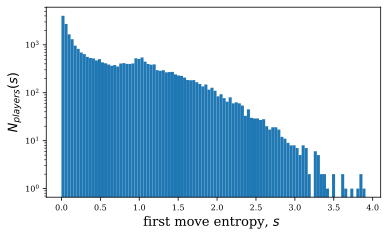

In [227]:
#------------------------------------------------
# PLOT
#------------------------------------------------
fig = plt.figure(0,figsize=(6, 3.5));
ax = fig.add_subplot(1, 1, 1);

ax.hist(store_entropy,100);
# ax.legend(store_lines,leg_,loc=(1.04,0));
ax.set_xlabel(r"first move entropy, $s$ ",fontsize=13)
ax.set_ylabel(r'$N_{players}(s)$',fontsize=13)
ax.set_yscale('log',base=10)
# ax.set_xticks(np.linspace(12,48,4));


In [369]:
# fig = plt.figure(0,figsize=(6, 3.5));
# ax = fig.add_subplot(1, 1, 1);
# ax.plot(store_rating);
# ax.set_yticks(list(np.linspace(0,1500,16)));
# store_rating
# store_rating

### Top 10 most played openings (Player ELO=1639)

ValueError: invalid literal for int() with base 10: '?'

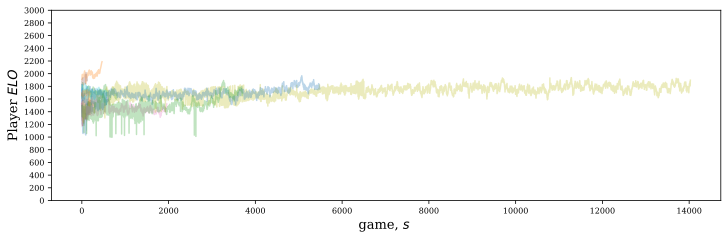

In [350]:

t_ic = time.time();
#------------------------------------------------
# PLOT
#------------------------------------------------
fig = plt.figure(0,figsize=(12, 3.5));
ax = fig.add_subplot(1, 1, 1);

# for it in range(len(ind)-1):
for it in range(45,80):

    if it % 10000 == 0:
        t_oc = time.time();
#         print('MONTH=','-----',it/(len(ind)-1))
        with open("/mnt/sdb1/sandeep/0. Careers in chess/a_OP_entropy_calc.txt", "a") as file_object:
            file_object.write('--'+str(it/(len(ind)-1))+'--i.e.-'+str(it)+'/'+str(len(ind)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')
    df_career_it=df_normal_careers.iloc[ind[it]+1:ind[it+1]+1,:]
#     df_career_it_white=df_career_it[df_career_it['is_white']==1]
    store_rating=[]

    if df_career_it.shape[0]>100:
        for it_game in range(df_career_it.shape[0]):
            is_white=df_career_it.iloc[it_game,13]
            rating_=df_career_it.iloc[it_game,9-is_white]
            store_rating.append(rating_)
        store_rating=[int(x) for x in store_rating]
   
        ax.plot(store_rating,alpha=.3);
        # ax.legend(store_lines,leg_,loc=(1.04,0));
        ax.set_xlabel(r"game, $s$ ",fontsize=13)
        ax.set_ylabel(r'Player $ELO$',fontsize=13)
        ax.set_yticks(list(np.linspace(0,3000,16)));


ax.set_xscale('log',base=10)
ax.set_ylim(1000,2500);

# ax.set_xticks(np.linspace(12,48,4));
# ax.set_xticks(np.linspace(12,48,4));


In [344]:
a=10;b=20
print(np.array(store_rating[a:b]).T)
df_career_it.iloc[a:b,:]
# df_career_it


[1308 1440 1229 1179 1434 1437 1443 1445 1454 1446]


,player_id,event_type,time_control,white_player,black_player,result_,utcdate,utctime,whiteelo,blackelo,opening_,actual_game_,termination_,is_white
189834,Maroz,Rated Blitz game,300+2,alex296,Maroz,1-0,2013.01.01,21:35:00,1298,1308,Polish Opening,1. b4 e5 2. Bb2 Nc6 3. b5 Nd4 4. e3 Nxb5 5. Bx...,Normal,0
189835,Maroz,Rated Classical game,1200+1,Maroz,caucaia,0-1,2013.01.01,21:35:44,1440,1633,Italian Game: Schilling-Kostic Gambit,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nd4 4. O-O Nxf3+ 5....,Normal,1
189836,Maroz,Rated Blitz game,300+2,Maroz,alex296,0-1,2013.01.01,21:40:30,1229,1304,"Italian Game: Giuoco Pianissimo, Normal",1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5 4. d3 Nf6 5. h3...,Normal,1
189837,Maroz,Rated Blitz game,360+0,daco,Maroz,1-0,2013.01.01,21:44:49,1575,1179,Bishop's Opening: Berlin Defense,1. e4 e5 2. Bc4 Nf6 3. d3 Bc5 4. h3 h6 5. Nf3 ...,Normal,0
189838,Maroz,Rated Classical game,660+5,Maroz,lifeofmg,1-0,2013.01.02,08:37:36,1434,1096,Russian Game: Three Knights Game,1. e4 e5 2. Nf3 Nf6 3. Nc3 Bd6 4. Bc4 Nc6 5. d...,Normal,1
189840,Maroz,Rated Classical game,660+5,Maroz,Violinist,1-0,2013.01.02,16:57:51,1437,1259,Sicilian Defense: Bowdler Attack,1. e4 c5 2. Bc4 Nc6 3. Nf3 e6 4. d3 Nf6 5. h3 ...,Normal,1
189841,Maroz,Rated Classical game,420+7,Malkav,Maroz,1-0,2013.01.02,17:43:10,1468,1443,Ruy Lopez: Cozio Defense,1. e4 e5 2. Nf3 Nc6 3. Bb5 Nge7 4. Bxc6 Nxc6 5...,Normal,0
189843,Maroz,Rated Classical game,480+10,sahinozan,Maroz,0-1,2013.01.02,17:57:28,1386,1445,Center Game: Normal Variation,1. e4 e5 2. d4 exd4 3. Qxd4 Nc6 4. Qd5 Nf6 5. ...,Normal,0
189844,Maroz,Rated Classical game,420+7,Beto370,Maroz,1/2-1/2,2013.01.02,18:21:06,1122,1454,Zukertort Opening: Black Mustang Defense,1. Nf3 Nc6 2. e3 e5 3. Nc3 Bb4 4. a3 Ba5 5. b4...,Normal,0
189845,Maroz,Rated Classical game,360+9,bagre,Maroz,0-1,2013.01.02,19:53:05,1351,1446,"King's Pawn Game: Wayward Queen Attack, Kiddie...",1. e4 e5 2. Qh5 Nf6 3. Qxe5+ Be7 4. d3 Nc6 5. ...,Normal,0


### Player ELO vs time

In [ ]:
store_entropy_op=[]

t_ic = time.time();

for it in range(len(ind)-1):
    if it % 1000 == 0:
        t_oc = time.time();
        print('FINISHED=','-----',it/(len(ind)-1))
        with open("/mnt/sdb1/sandeep/0. Careers in chess/a_OP_entropy_calc.txt", "a") as file_object:
            file_object.write('--'+str(it/(len(ind)-1))+'--i.e.-'+str(it)+'/'+str(len(ind)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')
    df_career_it=df_normal_careers.iloc[ind[it]:ind[it+1],:]
    df_career_it_white=df_career_it[df_career_it['is_white']==1]
    if df_career_it_white.shape[0]>100:
        df_op_counts=df_career_it_white.groupby(['opening_']).count()

        op_counts=np.array(df_op_counts.iloc[:,0])
        prob_=op_counts/np.sum(op_counts)
        entropy_=-np.sum(np.multiply(prob_,np.log2(prob_)))
        Y4_=np.sum(np.power(prob_,2))
        store_entropy_op.append(entropy_)

In [233]:
df_career_it_white

,player_id,event_type,time_control,white_player,black_player,result_,utcdate,utctime,whiteelo,blackelo,opening_,actual_game_,termination_,is_white
70692001,Crusps,Rated Classical game,600+1,Crusps,shinobinobushi,1-0,2015.08.05,21:48:33,1349,1543,Sicilian Defense,1. e4 { [%eval 0.17] } 1... c5 { [%eval 0.3] }...,Normal,1
70692002,Crusps,Rated Classical game,600+1,Crusps,MVE,0-1,2015.08.06,11:40:52,1543,1117,Scandinavian Defense,1. e4 d5 2. Bb5+ Bd7 3. c4 dxc4 4. Qa4 a6 5. B...,Normal,1
70692006,Crusps,Rated Classical game,600+0,Crusps,sladkiy_yoba,0-1,2015.08.08,02:17:42,1313,1579,Sicilian Defense: Bowdler Attack,1. e4 { [%eval 0.21] } 1... c5 { [%eval 0.27] ...,Normal,1
70692009,Crusps,Rated Classical game,900+0,Crusps,FittaBFC,0-1,2015.08.10,00:03:40,1314,1333,King's Pawn Game: Wayward Queen Attack,1. e4 { [%eval 0.13] } 1... e5 { [%eval 0.09] ...,Normal,1
70692010,Crusps,Rated Classical game,900+0,Crusps,jonathanfag,1-0,2015.08.10,00:22:10,1276,1295,English Opening,1. c4 { [%eval 0.11] } 1... d6 { [%eval 0.29] ...,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70692374,Crusps,Rated Classical game,900+0,Crusps,mohsenomidvar1989,0-1,2016.08.09,12:43:09,1534,1512,Modern Defense,1. e4 g6 2. c3 Bg7 3. f3 e5 4. h4 d5 5. exd5 Q...,Normal,1
70692375,Crusps,Rated Classical game,900+0,Crusps,omaraljohni,0-1,2016.08.09,13:31:12,1522,1722,French Defense #2,1. e4 e6 2. c3 c5 3. h4 Nc6 4. f3 d5 5. Bd3 d4...,Normal,1
70692381,Crusps,Rated Classical game,900+0,Crusps,ilir19,0-1,2016.08.13,15:15:43,1551,1770,Gedult's Opening,1. f3 Nf6 2. h4 g6 3. d4 d6 4. g4 Nc6 5. c3 e5...,Normal,1
70692383,Crusps,Rated Classical game,900+0,Crusps,orkunfav,1-0,2016.08.18,02:30:56,1536,1432,Queen's Pawn Game,1. d4 d5 2. f3 Nc6 3. c3 e5 4. h4 e4 5. b4 exf...,Normal,1


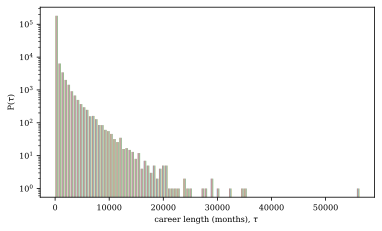

In [37]:
career_lens=df_normal_careers.groupby(['player_id']).count()
fig = plt.figure(0,figsize=(6, 3.5));
ax = fig.add_subplot(1, 1, 1);

ax.hist(career_lens,100);

# ax.legend(store_lines,leg_,loc=(1.04,0));
ax.set(xlabel=r"career length (months), $\tau$ ", ylabel=r'P($\tau$)');
ax.set_yscale('log',base=10)
# ax.set_xticks(np.linspace(12,48,4));
